<a href="https://colab.research.google.com/github/supriya122-star/ANN_project-Churn_data-/blob/main/ANN_CHURN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.8.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 100.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 KB 44.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.11.2
    Uninstalling tensorboard-2.11.2:
      Successfully uninstalled tensorboard-2.11.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.11.0
    Uninstalling tensorflow-2.11.0:
      Successfully uninstalled tensorflow-2.11.0


In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [3]:
# import some basic libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X = dataset.iloc[:,3:13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
y = dataset.iloc[:,13]

In [7]:
geography = pd.get_dummies(X['Geography'],drop_first=True)
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [8]:
gender = pd.get_dummies(X['Gender'],drop_first=True)
gender.head()


,Male
0,0
1,0
2,0
3,0
4,0


In [9]:
X.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [10]:
X = X.drop(['Geography','Gender'],axis=1)


In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [12]:
X = pd.concat([X,geography,gender],axis=1)

In [13]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [14]:
#Splitting the dataset into training set and test set 
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [15]:
#Feature Scaling 
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [20]:
pip install keras==2.8


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0


In [21]:
## Part2 now lets create ANN
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout


In [22]:
#Lets initialize the ANN
classifier = Sequential()

In [23]:
##Adding the input layer 
classifier.add(Dense(units=11,activation='relu'))

In [24]:
##Adding the hidden layer 1
classifier.add(Dense(units=7,activation='relu'))

In [25]:
##Adding the hidden layer 2
classifier.add(Dense(units=6,activation='relu'))

In [26]:
##Adding the output layer 
classifier.add(Dense(1,activation='sigmoid'))


In [27]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [28]:
##Early Stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


In [ ]:
##When wanted to change the default learning_rate
import tensorflow
tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [30]:
#Train the model
model_history = classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 6s 5ms/step - loss: 0.4952 - accuracy: 0.7850 - val_loss: 0.4471 - val_accuracy: 0.7989
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4227 - accuracy: 0.8132 - val_loss: 0.4216 - val_accuracy: 0.8122
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3925 - accuracy: 0.8356 - val_loss: 0.3990 - val_accuracy: 0.8243
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3670 - accuracy: 0.8503 - val_loss: 0.3797 - val_accuracy: 0.8349
Epoch 5/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3513 - accuracy: 0.8565 - val_loss: 0.3737 - val_accuracy: 0.8383
Epoch 6/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.3434 - accuracy: 0.8580 - val_loss: 0.3694 - val_accuracy: 0.8395
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3388 - accuracy: 0.8593 - val_loss: 0.3666 - val_accuracy:

In [31]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

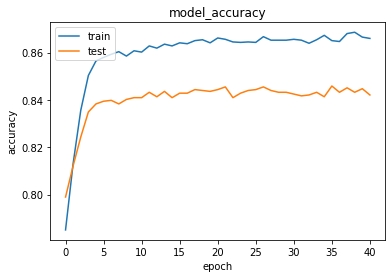

In [34]:
#Summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc= 'upper left')
plt.show()

In [36]:
#making the predictions and evaluating the model
y_pred = classifier.predict(X_test)
y_pred = (y_pred>=0.5)

In [39]:
#make the confusion matrix 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[1512,   83],
       [ 192,  213]])

In [42]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,Y_test)
score

0.8625